<H2> Introduction </H2><Br>
In this notebook we shall be discussing about Noise Filteration and Some Basic Feature Extraction from our data. Hope you guys use this as a reference and code by yourself rather than copy pasting the steps shown here.

First we should import all the necessary libraries. Note: If you don't have any of these library unavailable on your system go to command promt and type "pip install 'name of library'" for example for tsfel "pip install tsfel".
I am in an assumption that you have anaconda navigator installed so pip is available by default.

In [1]:
import os #for creating path variables 
import tsfel #time series feature extraction library for our project.
import pandas as pd #Data handaling library. pd chai name rakhdeko ho call garna easy hoss vanera
import numpy as np 
import matplotlib.pyplot as plt
from EmgFilter import EMG_Filter #this is the filter I created for filtering the signal. Its source code is in EmgFilter.py

Now we have to load the data using pandas. We use read_csv functions which allows us to read the DataFiles in .csv format.

In [2]:
DataFrame = pd.read_csv('EMG-data.csv')
DataFrame

time  channel1  channel2  channel3  channel4  channel5  channel6  \
0            1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
1            5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
2            6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
3            7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
4            8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
...        ...       ...       ...       ...       ...       ...       ...   
4237902  50962   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   
4237903  50963   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   
4237904  50964   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   
4237905  50965   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   
4237906  50966   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   

         channel7  channel8  class  label  
0         0.00000  -0.00001      0      1  
1         0.00000  -0.00001      0      1  
2        -0.00001   0.00001      0      1  
3        -0.00001   0.00001      0      1  
4        -0.00001   0.00001      0      1  
...           ...       ...    ...    ...  
4237902   0.00002   0.00002      0     36  
4237903   0.00002   0.00002      0     36  
4237904   0.00002   0.00002      0     36  
4237905   0.00002   0.00002      0     36  
4237906   0.00002   0.00002      0     36  

[4237907 rows x 11 columns]

As we can see here we have 4237907 raw signal data. The time here is in miliseconds. The label of the data signifies the people from whom these data were taken. As this data was taken from 36 people we have 1-36 labels.
We also have total 8 classes of this data starting from 0-7. The description of each classes are :<br>
0 - unmarked data,<br>
1 - hand at rest, <br>
2 - hand clenched in a fist, <br>
3 - wrist flexion,<br>
4 – wrist extension,<br>
5 – radial deviations,<br>
6 - ulnar deviations,<br>
7 - extended palm (the gesture was not performed by all subjects).<br>
The channels from 1-8 are the sensors from which the signal data were taken.


As this data is very large we shall divide these data into diffrent parts and compute the respective features seperately and use pd.to_csv() function to store these features in a csv file of which you don't have to worry about now. For this instance let's take the data of label 1 and extract the features of class 2.

In [3]:
DF = DataFrame[DataFrame.label==1].copy() #this code is used to copy the contents of DataFrame to DF where the label==1 ie person 1
DF

time  channel1  channel2  channel3  channel4  channel5  channel6  \
0           1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
1           5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
2           6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
3           7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
4           8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
...       ...       ...       ...       ...       ...       ...       ...   
121165  60648  -0.00001   0.00001  -0.00001  -0.00001   0.00000  -0.00002   
121166  60649  -0.00001   0.00001  -0.00001  -0.00001   0.00000  -0.00002   
121167  60650  -0.00001   0.00001  -0.00001  -0.00001   0.00000  -0.00002   
121168  60651  -0.00001   0.00001  -0.00001  -0.00001   0.00000  -0.00002   
121169  60652  -0.00001   0.00001  -0.00001  -0.00001   0.00000  -0.00002   

        channel7  channel8  class  label  
0        0.00000  -0.00001      0      1  
1        0.00000  -0.00001      0      1  
2       -0.00001   0.00001      0      1  
3       -0.00001   0.00001      0      1  
4       -0.00001   0.00001      0      1  
...          ...       ...    ...    ...  
121165   0.00000  -0.00003      0      1  
121166   0.00000  -0.00003      0      1  
121167   0.00000  -0.00003      0      1  
121168   0.00000  -0.00003      0      1  
121169   0.00000  -0.00003      0      1  

[121170 rows x 11 columns]

Here we have the data from person 1. Now lets filter out class 2 from this data as we are intrested in class 2 for now. Note that the name of the class column is changed into group in the following steps to avoid namespace clash in pandas library. If it is not done python raises a syntax error.

In [4]:
DF.rename(columns={'class':'group'}, inplace=True) #changing the name of class column to group.inplace keyword makes the change permanent.
DF= DF[DF.group == 2] #Selecting group 2
DF

time  channel1  channel2  channel3  channel4  channel5  channel6  \
6424    6662  -0.00011  -0.00002  -0.00007  -0.00008  -0.00016  -0.00018   
6425    6663   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
6426    6664   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
6427    6665   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
6428    6666   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
...      ...       ...       ...       ...       ...       ...       ...   
98401  36873  -0.00005   0.00001  -0.00002  -0.00007  -0.00009   0.00001   
98402  36874  -0.00005   0.00001  -0.00002  -0.00007  -0.00009   0.00001   
98403  36875  -0.00006  -0.00006   0.00002   0.00000   0.00000  -0.00016   
98404  36876  -0.00006  -0.00006   0.00002   0.00000   0.00000  -0.00016   
98405  36877  -0.00006  -0.00006   0.00002   0.00000   0.00000  -0.00016   

       channel7  channel8  group  label  
6424   -0.00036  -0.00001      2      1  
6425   -0.00021   0.00006      2      1  
6426   -0.00021   0.00006      2      1  
6427   -0.00021   0.00006      2      1  
6428   -0.00021   0.00006      2      1  
...         ...       ...    ...    ...  
98401  -0.00015  -0.00009      2      1  
98402  -0.00015  -0.00009      2      1  
98403  -0.00007  -0.00003      2      1  
98404  -0.00007  -0.00003      2      1  
98405  -0.00007  -0.00003      2      1  

[6806 rows x 11 columns]

Here we have data only of group (class) 2. Now let us visualise the signal from diffrent channels by plotting them against time. But first let us set the index of our DataFrame to time and remove the group and label columns.(optional)

In [5]:
DF.set_index('time', inplace=True) #setting time as an index of dataframe
DF = DF[['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8']] #selecting channels only removing groups and labels
DF

channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
time                                                                          
6662   -0.00011  -0.00002  -0.00007  -0.00008  -0.00016  -0.00018  -0.00036   
6663    0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025  -0.00021   
6664    0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025  -0.00021   
6665    0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025  -0.00021   
6666    0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025  -0.00021   
...         ...       ...       ...       ...       ...       ...       ...   
36873  -0.00005   0.00001  -0.00002  -0.00007  -0.00009   0.00001  -0.00015   
36874  -0.00005   0.00001  -0.00002  -0.00007  -0.00009   0.00001  -0.00015   
36875  -0.00006  -0.00006   0.00002   0.00000   0.00000  -0.00016  -0.00007   
36876  -0.00006  -0.00006   0.00002   0.00000   0.00000  -0.00016  -0.00007   
36877  -0.00006  -0.00006   0.00002   0.00000   0.00000  -0.00016  -0.00007   

       channel8  
time             
6662   -0.00001  
6663    0.00006  
6664    0.00006  
6665    0.00006  
6666    0.00006  
...         ...  
36873  -0.00009  
36874  -0.00009  
36875  -0.00003  
36876  -0.00003  
36877  -0.00003  

[6806 rows x 8 columns]

The main reason of removing the labels and groups was it makes us easy while plotting, filterting and feature extraction. We can add them to our data later on if needed. Now lets plot the signals using plot function of the dataframe.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f732f493ed0>,
      dtype=object)

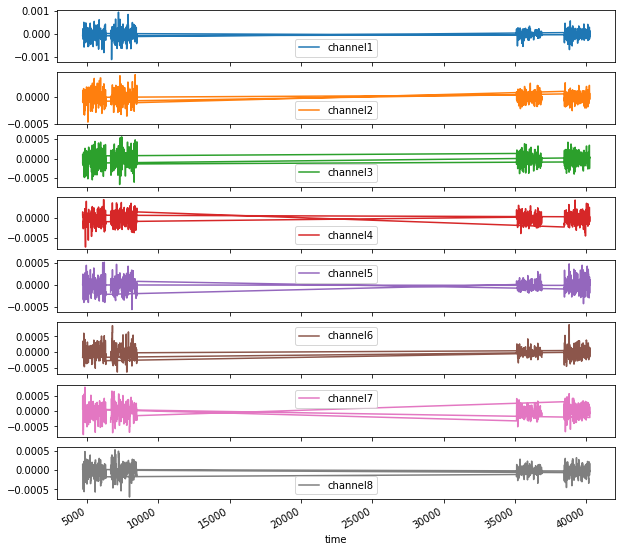

In [6]:
DF.plot(subplots=True, figsize=(10,10))

<H2>Pre-Processing</H2><br>
<H3>1) Filtration</H3><br>
Most of the EMG signals have frequency between 30Hz and 350-450 Hz. So we shall use our EMG_filter to filter out the noise from our signal.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73302757d0>,
      dtype=object)

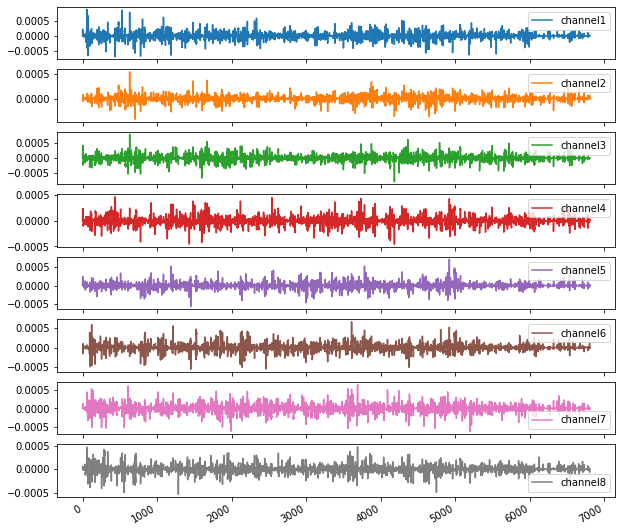

In [7]:
DF_filtered = EMG_Filter(DF,high_band=30, low_band=450) #filtering the signals between 30Hz and 450 Hz.
DF_filtered.plot(subplots=True, figsize=(10,10)) #plotting the filtered data

Note that after filtration all the signals point has been merged and the gaps in the signals are removed. I am also not entirely sure what is happeing here and is this supposed to happeing or not. We shall discuss about this later.

<H3>2) Rectification (Optional)</H3><br>
Now we have a filtered signal so now let us rectify the signal ie transfer all the signal points to positive axis.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f732a379a10>,
      dtype=object)

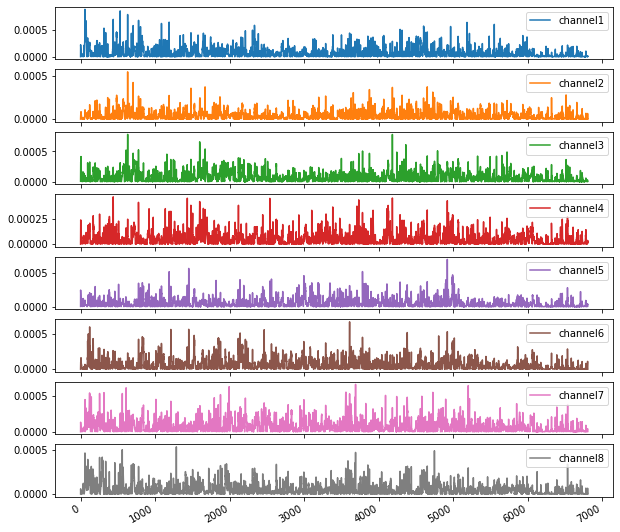

In [8]:
DF_rectified = DF_filtered.apply(lambda x: abs(x)) #using full wave rectification
DF_rectified.plot(subplots=True, figsize=(10,10)) #plotting the rectified signal

Here we can see all our signals are rectified ie they are transfered to positive axis. Note that this is full wave rectfication. In half wave rectifications the signals on the negative axis are simply ignored. But as the signals in the negative axis also contains some meaning we cannot use half wave rectification here.

<H2> Feature Extraction </H2> <br>
After completion of preprocessing let us start the feature extraction of the pre-processed (filtered + rectified) signals stored in DF_rectified.

For feature extraction we are using our own features module stored in features.py but first we have to add it to tsfel to make sure it is recognised by the tsfel module. This is probably a one time thing to do (I am also not certain about this :p ) So lets do that first.

In [9]:
#creting path variables (yo vaneko tyo file ko location kaha xa vanera specify gareko ho)
#We are making the assumption that the features.py, features.json and this notebook files are in same folder (directory)
module_path = os.path.join(os.getcwd(),'features.py') #os.getcwd() gives the current working directory 
json_path = os.path.join(os.getcwd(),'features.json') #os.path.join joins the current working directory to the file

#adding the features to the tsfel module
tsfel.add_personal_features.add_feature_json(module_path, json_path) 

Feature RMS was added.
Feature IAV was added.
Feature MAV was added.
Feature SSI was added.
Feature VAR was added.


Our features in features.py were sucessfully added to the tsfel module. Now we need a dictionary variable accessing our features.json file so that we can use this dictionary in tsfel.time_series_feature_extractor() function to extract our features.

In [10]:
#importing our feature dictionary ie features.json
feat_dict = tsfel.get_features_by_domain('temporal', json_path) #the domain of our created feature is temporal
#tsfel module provides 3 domains for features which are statistical, spectral, and temporal.
#I have creted our features in temporal domain. (Domain doesn't matter)

Now that our feat_dict is ready lets use this to extract the features from our DF_rectified data frame.

In [11]:
Features = tsfel.time_series_features_extractor(feat_dict, DF_rectified, fs=1000, window_spliter=True, window_size = 50, features_path= module_path)
Features

*** Feature extraction started ***



*** Feature extraction finished ***


0_IAV     0_MAV     0_RMS         0_SSI         0_VAR     1_IAV  \
0    0.002814  0.000056  0.000082  3.389523e-07  3.611399e-09  0.000909   
1    0.013069  0.000261  0.000348  6.040604e-06  5.249613e-08  0.001552   
2    0.005442  0.000109  0.000133  8.840174e-07  5.832722e-09  0.002012   
3    0.002432  0.000049  0.000065  2.094978e-07  1.824303e-09  0.002085   
4    0.004146  0.000083  0.000116  6.694462e-07  6.514844e-09  0.002640   
..        ...       ...       ...           ...           ...       ...   
131  0.002266  0.000045  0.000065  2.080592e-07  2.107155e-09  0.001936   
132  0.001091  0.000022  0.000040  7.925700e-08  1.109009e-09  0.000534   
133  0.001964  0.000039  0.000053  1.400066e-07  1.256523e-09  0.001143   
134  0.000759  0.000015  0.000025  3.146750e-08  3.986502e-10  0.000763   
135  0.000455  0.000009  0.000019  1.738657e-08  2.650260e-10  0.000327   

        1_MAV     1_RMS         1_SSI         1_VAR  ...     6_IAV     6_MAV  \
0    0.000018  0.000028  4.016976e-08  4.731800e-10  ...  0.001549  0.000031   
1    0.000031  0.000040  8.122076e-08  6.605840e-10  ...  0.006261  0.000125   
2    0.000040  0.000053  1.419517e-07  1.220392e-09  ...  0.009407  0.000188   
3    0.000042  0.000058  1.710136e-07  1.681082e-09  ...  0.004769  0.000095   
4    0.000053  0.000077  2.936010e-07  3.084423e-09  ...  0.004908  0.000098   
..        ...       ...           ...           ...  ...       ...       ...   
131  0.000039  0.000058  1.655886e-07  1.812950e-09  ...  0.000959  0.000019   
132  0.000011  0.000022  2.453316e-08  3.766560e-10  ...  0.000602  0.000012   
133  0.000023  0.000038  7.174288e-08  9.121910e-10  ...  0.001028  0.000021   
134  0.000015  0.000028  3.864614e-08  5.397962e-10  ...  0.001665  0.000033   
135  0.000007  0.000012  7.464212e-09  1.065719e-10  ...  0.000405  0.000008   

        6_RMS         6_SSI         6_VAR     7_IAV     7_MAV     7_RMS  \
0    0.000042  8.626854e-08  7.654727e-10  0.001747  0.000035  0.000048   
1    0.000165  1.361801e-06  1.155372e-08  0.007627  0.000153  0.000193   
2    0.000236  2.783589e-06  2.027707e-08  0.005836  0.000117  0.000138   
3    0.000114  6.525819e-07  3.954425e-09  0.004749  0.000095  0.000120   
4    0.000122  7.496669e-07  5.359171e-09  0.002205  0.000044  0.000056   
..        ...           ...           ...       ...       ...       ...   
131  0.000033  5.513485e-08  7.346669e-10  0.001362  0.000027  0.000042   
132  0.000031  4.874876e-08  8.300539e-10  0.001218  0.000024  0.000034   
133  0.000037  6.797039e-08  9.369466e-10  0.001738  0.000035  0.000046   
134  0.000050  1.228093e-07  1.347188e-09  0.001292  0.000026  0.000040   
135  0.000015  1.153204e-08  1.651029e-10  0.000304  0.000006  0.000012   

            7_SSI         7_VAR  
0    1.168753e-07  1.117226e-09  
1    1.869624e-06  1.412235e-08  
2    9.523724e-07  5.423628e-09  
3    7.194880e-07  5.369534e-09  
4    1.583308e-07  1.222445e-09  
..            ...           ...  
131  8.798730e-08  1.017573e-09  
132  5.838518e-08  5.744772e-10  
133  1.053762e-07  8.994606e-10  
134  7.902488e-08  9.127716e-10  
135  6.883028e-09  1.007124e-10  

[136 rows x 40 columns]

Here we are using sampling frequency of 1000 to match the sampling frequency of our filter. Also window size of 50 is taken here. These parameters are random for now and has to be discussed with the teacher before finalising. You can see that of all the channels features extractions has been completed all at once. And we have a data frame of features called Features. We can also plot all of these features using plot functions since there are 40 columns we will be obtaining 40 figures so lets just plot RMS of all channels.

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f732a0d52d0>,
       dtype=object),)

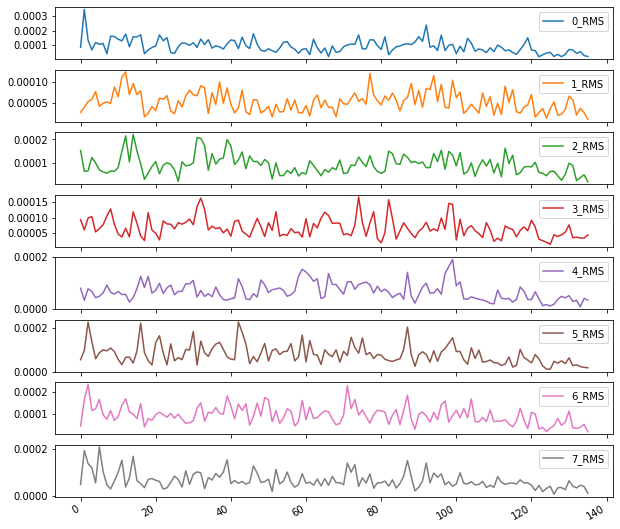

In [12]:
Features.plot(y=['0_RMS', '1_RMS', '2_RMS', '3_RMS', '4_RMS', '5_RMS', '6_RMS','7_RMS' ], subplots=True, figsize=(10,10)),

Note that 0 signifies for the 1st column of our data fram ie channel1 and so on. So, we have finally completed the feature extractions (RMS,IAV,MAV,SSI,VAR) for class 2 of label 1. I hope you all got a general idea for the first two phases for our projects. I hope you all will try these same things on other classes to get general idea. And I encourage you all to explore the data at your free time and come up with new ideas for preprocessing and feature extraction. If you have any doubts please let me know.

Also before ending this session lets us save our features to csv so that it can we called and used in the future without having to repeat these steps.

In [13]:
Features.to_csv('Features_lb2_cl2.csv') #converting the dataframe to csv file